# Compresión de imagenes.

## Aplicaciones de la descomposición en valores singulares.

La descomposición en valores singulares de una matriz $A$ es la factorización de $A$ como el producto de dos o más matrices de tal forma que sus factores satisfagan ciertas propuiedades deseadas, según el problema a resolver. En particualr es común que se busque una factorización cómo la siguiente $A=UDV^T$ donde las columnas de $U$ y $V$ son ortonormales, y la matriz D es Diagonal con entradas positivas y relaes <!--(como Wu-Tang Clan)-->

Es usual procede factorizando la matriz en el producto de matrices triangulares, sea el caso de $LU$ y sus variantes ($LDU,LUP,LL^T$) para resolver ecuaciones lineales como: $Ax=b$ dónde $A\in\mathbb{R}^{n\times n}$ es una matriz cuadrada  y $b\in\mathbb{R}^n$ es un vector. Diremos que $L$ es una matriz triangular inferior con $1$s en la diagonal y $U$ es una matriz triangular superior


In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [24]:
#Cargamos la imagen sobre la que aplicaremos el método como una variable
imagen = np.array(Image.open('test.jpg'))

In [25]:
imagen = imagen / 255
#Normalizamos la imagen
row, col, _ = imagen.shape
print "pixels: ", row, "*", col

pixels:  1000 * 1600


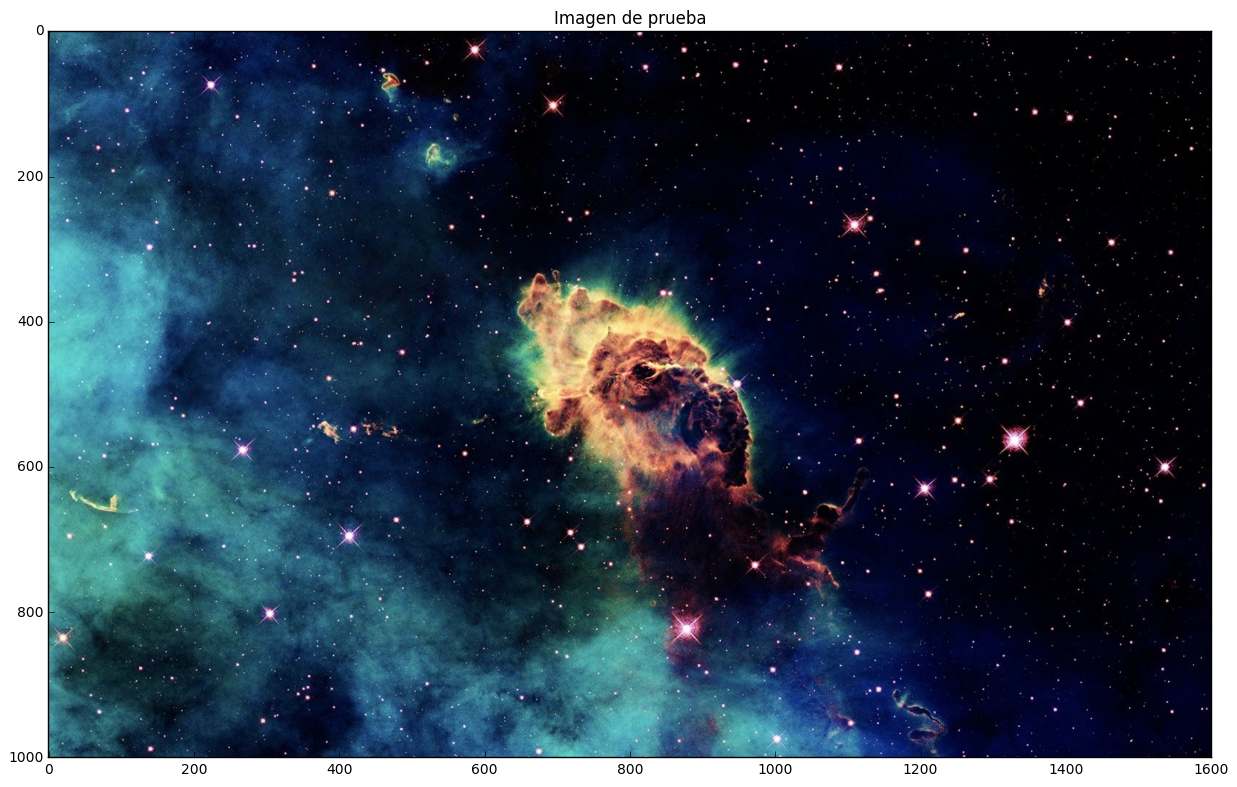

In [26]:
fig = plt.figure(figsize=(15, 10))
a = fig.add_subplot(1, 1, 1)
imgplot = plt.imshow(imagen)
a.set_title('Imagen de prueba')
plt.show()

In [27]:
imagenCanalRojo = imagen[:, :, 0]
imagenCanalVerde = imagen[:, :, 1]
imagenCanalAzul = imagen[:, :, 2]

In [37]:
originalBytes = imagen.nbytes
print "El espacio necesario para almacenar la imagen (en bytes) es:", original_bytes

 El espacio necesario para almacenar la imagen (en bytes) es: 38400000


In [38]:
#Donde R=Red, G=Green y B=Blue
U_r, d_r, V_r = np.linalg.svd(imagenCanalRojo, full_matrices=True)
U_g, d_g, V_g = np.linalg.svd(imagenCanalVerde, full_matrices=True)
U_b, d_b, V_b = np.linalg.svd(imagenCanalAzul, full_matrices=True)

In [39]:
bytesParaAlmacenar = sum([matrix.nbytes for matrix in [U_r, d_r, V_r, U_g, d_g, V_g, U_b, d_b, V_b]])
print "Las matrices que almacenaremos tiene el tamaño de (en bytes):", bytesParaAlmacenar
print "La diferencia de tamaño es:", originalBytes-bytesParaAlmacenar

Las matrices que almacenaremos tiene el tamaño de (en bytes): 85464000
La diferencia de tamaño es: -47064000


In [70]:
k = 10

In [71]:
U_r_k = U_r[:, 0:k]
V_r_k = V_r[0:k, :]
U_g_k = U_g[:, 0:k]
V_g_k = V_g[0:k, :]
U_b_k = U_b[:, 0:k]
V_b_k = V_b[0:k, :]

d_r_k = d_r[0:k]
d_g_k = d_g[0:k]
d_b_k = d_b[0:k]

In [72]:
bytesComprimidos = sum([matrix.nbytes for matrix in 
                        [U_r_k, d_r_k, V_r_k, U_g_k, d_g_k, V_g_k, U_b_k, d_b_k, V_b_k]])
print "Las matrices comprimidas que almacenamos ahora pesan (en bytes):", bytesComprimidos
print "La diferencia de tamaño respecto a la imagen es:",originalBytes - bytesComprimidos
print "La diferencia de tamaño respecto a la matriz es:",bytesParaAlmacenar-bytesComprimidos

Las matrices comprimidas que almacenamos ahora pesan (en bytes): 624240
La diferencia de tamaño respecto a la imagen es: 37775760
La diferencia de tamaño respecto a la matriz es: 84839760


In [73]:
razon = originalBytes/bytesComprimidos
print "El procentaje de compresión es de", razon,"%"

El procentaje de compresión es de 61.5148019992 %


In [74]:
image_red_approx = np.dot(U_r_k, np.dot(np.diag(d_r_k), V_r_k))
image_green_approx = np.dot(U_g_k, np.dot(np.diag(d_g_k), V_g_k))
image_blue_approx = np.dot(U_b_k, np.dot(np.diag(d_b_k), V_b_k))

In [75]:
image_reconstructed = np.zeros((row, col, 3))

image_reconstructed[:, :, 0] = image_red_approx
image_reconstructed[:, :, 1] = image_green_approx
image_reconstructed[:, :, 2] = image_blue_approx

In [76]:
image_reconstructed[image_reconstructed < 0] = 0
image_reconstructed[image_reconstructed > 1] = 1

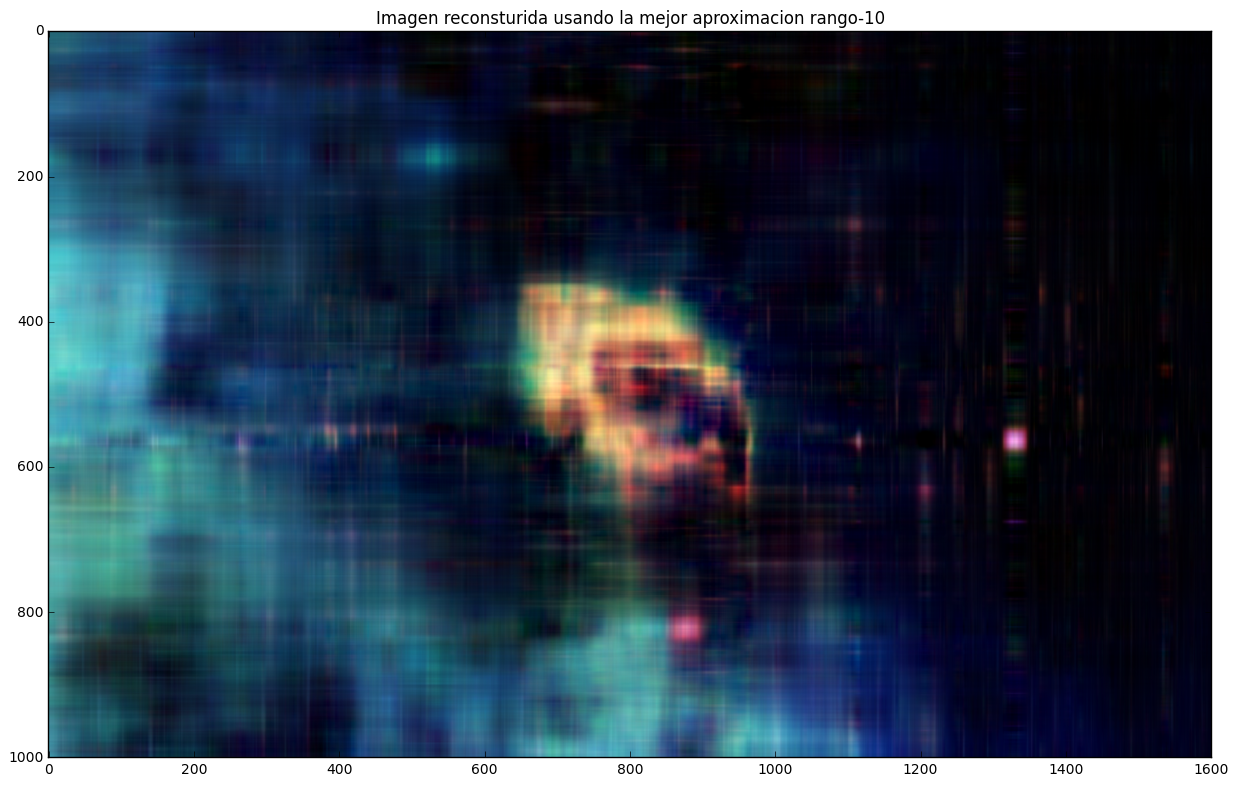

In [77]:
fig = plt.figure(figsize=(15, 10))
a = fig.add_subplot(1, 1, 1)
imgplot = plt.imshow(image_reconstructed)
a.set_title('Imagen reconsturida usando la mejor aproximacion rango-{}'.format(k))
plt.show()

In [78]:
k = 1

U_r_k = U_r[:, 0:k]
V_r_k = V_r[0:k, :]
U_g_k = U_g[:, 0:k]
V_g_k = V_g[0:k, :]
U_b_k = U_b[:, 0:k]
V_b_k = V_b[0:k, :]

d_r_k = d_r[0:k]
d_g_k = d_g[0:k]
d_b_k = d_b[0:k]

image_red_approx = np.dot(U_r_k, np.dot(np.diag(d_r_k), V_r_k))
image_green_approx = np.dot(U_g_k, np.dot(np.diag(d_g_k), V_g_k))
image_blue_approx = np.dot(U_b_k, np.dot(np.diag(d_b_k), V_b_k))

image_reconstructed = np.zeros((row, col, 3))
image_reconstructed[:, :, 0] = image_red_approx
image_reconstructed[:, :, 1] = image_green_approx
image_reconstructed[:, :, 2] = image_blue_approx
image_reconstructed[image_reconstructed < 0] = 0
image_reconstructed[image_reconstructed > 1] = 1

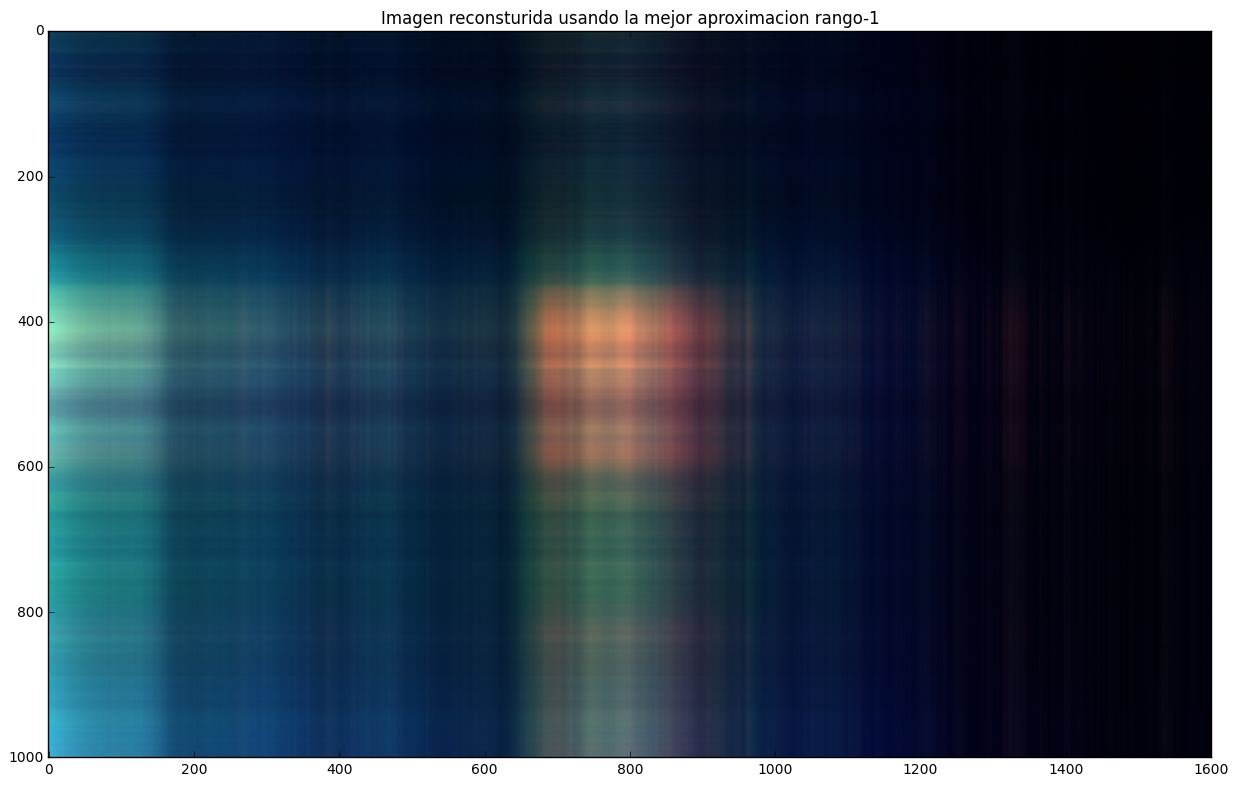

In [79]:
fig = plt.figure(figsize=(15, 10))
a = fig.add_subplot(1, 1, 1)
imgplot = plt.imshow(image_reconstructed)
a.set_title('Imagen reconsturida usando la mejor aproximacion rango-{}'.format(k))
plt.show()

In [80]:
k = 200

U_r_k = U_r[:, 0:k]
V_r_k = V_r[0:k, :]
U_g_k = U_g[:, 0:k]
V_g_k = V_g[0:k, :]
U_b_k = U_b[:, 0:k]
V_b_k = V_b[0:k, :]

d_r_k = d_r[0:k]
d_g_k = d_g[0:k]
d_b_k = d_b[0:k]

image_red_approx = np.dot(U_r_k, np.dot(np.diag(d_r_k), V_r_k))
image_green_approx = np.dot(U_g_k, np.dot(np.diag(d_g_k), V_g_k))
image_blue_approx = np.dot(U_b_k, np.dot(np.diag(d_b_k), V_b_k))

image_reconstructed = np.zeros((row, col, 3))
image_reconstructed[:, :, 0] = image_red_approx
image_reconstructed[:, :, 1] = image_green_approx
image_reconstructed[:, :, 2] = image_blue_approx
image_reconstructed[image_reconstructed < 0] = 0
image_reconstructed[image_reconstructed > 1] = 1

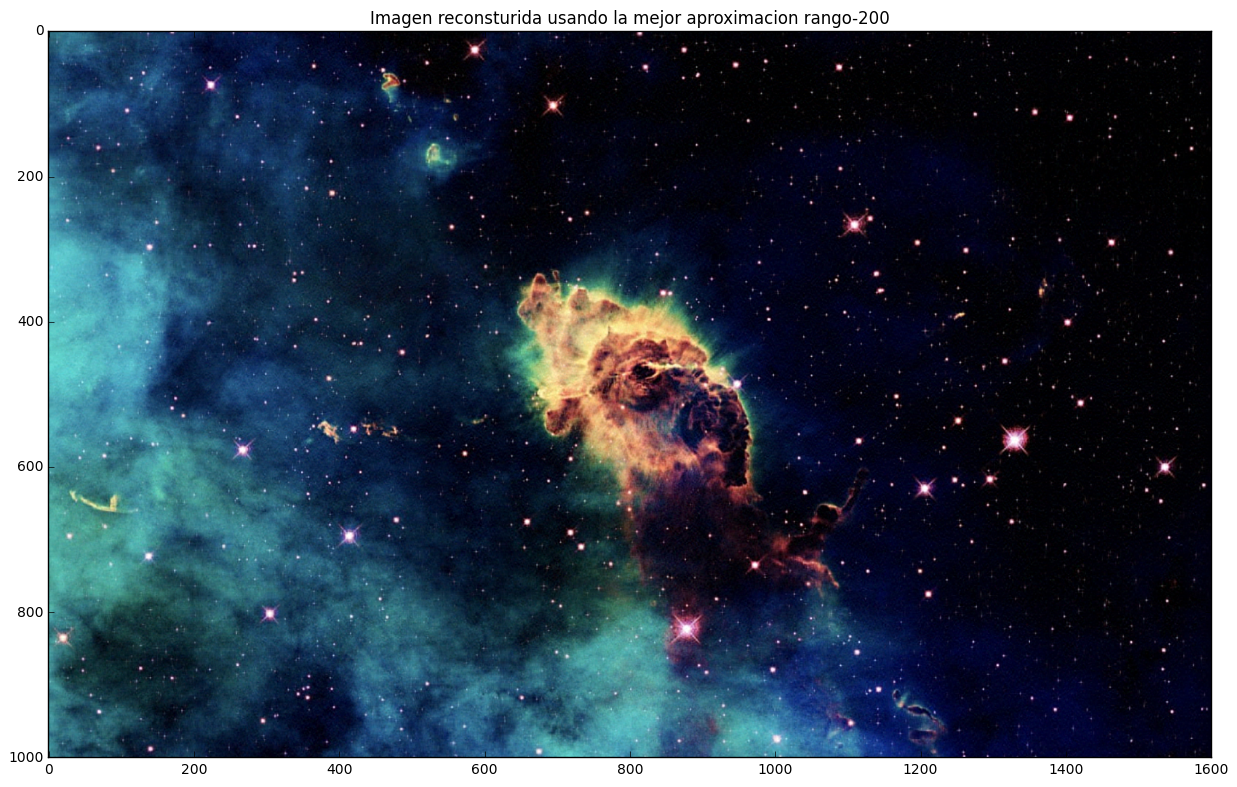

In [81]:
fig = plt.figure(figsize=(15, 10))
a = fig.add_subplot(1, 1, 1)
imgplot = plt.imshow(image_reconstructed)
a.set_title('Imagen reconsturida usando la mejor aproximacion rango-{}'.format(k))
plt.show()